# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

## Импорт бибилиотек ##

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.preprocessing import normalize
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Используем метрику полноты для получения вероятности Yes(Уйдет клиент)
from sklearn.metrics import recall_score

# 1. Описание данных

In [11]:
df = pd.read_csv('telecom_users.csv')
df.head(2)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No


In [5]:
def info(df):
    """Функция ознакомления с данными"""
    print(f'Датасет имеет {df.shape[0]} выборок и {df.shape[1]} признаков\n')
    print('Признаков с пропущенными значениями:', df.isnull().sum()[df.isnull().sum() != 0].count())
    print('\nУникальные значения каждого признака:')
    print(df.nunique())
    print('\nТип данных признаков')
    print(df.dtypes)
    
info(df)

Датасет имеет 5986 выборок и 22 признаков

Признаков с пропущенными значениями: 0

Уникальные значения каждого признака:
Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

Тип данных признаков
Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity

## Подготовка данных ##

In [12]:
# Трансформация TotalCharges в тип float
df.TotalCharges = [np.nan if n == ' ' else n for n in df.TotalCharges]
df.TotalCharges = df.TotalCharges.astype(float)
df.fillna(df.TotalCharges.median(), inplace = True)

# Исключение индексации
df.drop(['Unnamed: 0', 'customerID'], axis = 1, inplace = True)

# Трансформация некоторыч признаков в численный тип
df.gender = [1 if sex == 'Male' else 0 for sex in df.gender]
df.Partner = [1 if have == 'Yes' else 0 for have in df.Partner]
df.Churn = df['Churn'].astype('category').cat.codes

# Деление данных на категориальные и численные
X_cat = df.select_dtypes(include=['object']).copy()
X_num = df.select_dtypes(include=['int', 'float']).copy()

# Трансформация категроиальных признаков в численные
enc = OneHotEncoder()
enc.fit(X_cat)
X_encoded = enc.transform(X_cat).toarray()
feature_names = X_cat.columns
new_feature_names = enc.get_feature_names(feature_names)
X_cat = pd .DataFrame (X_encoded, columns = new_feature_names)

# Обьединение признаки
df = pd.concat([X_cat, X_num, df['Churn']], axis = 1)

# 2. Исследование зависимостей и формулирование гипотез

In [ ]:
# На этом гарфике сложнол визуально оценить и строить гипотезы так как признаков много и масштаб графика этого не позваляет
sns.pairplot(df, corner = True, hue = 'Churn')
plt.show()

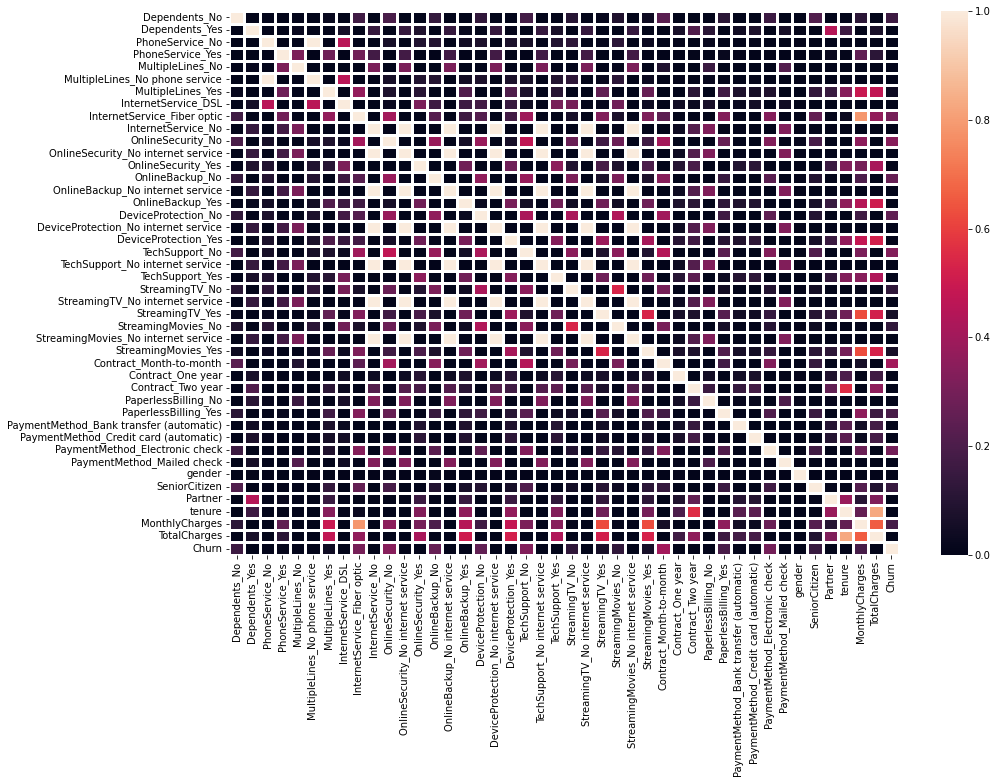

In [8]:
# По тепловой катре сложно что то сказать однозначно так как корреляция признаков не привышает 0.4 что есть плохо
# Но из тех что есть значение имею интернет провайдер Fiber_optic, отсутствие онлайн безопасности, 
# отсутствие технической поддержки, просмотр ТВ, ежемесячный тип контракта, метод оплаты эл. чеком
plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), vmin = 0, linewidths=3, linecolor = 'white')
df = df[list(df.corr()['Churn'][df.corr()['Churn'] >= -0.1].index)]
plt.show()

# 3. Построение моделей для прогнозирования оттока
### Попробовал несколко моделий и стекинг с ними, но лучший результат дала модель xgboost ###
### Без настройки весов Recall показывает 0.92 ###

In [13]:
df.head()

,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1,0,1,72,24.10,1734.65,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0,0,0,44,88.15,3973.20,0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,1,1,38,74.95,2869.85,1
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1,0,0,4,55.90,238.50,0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1,0,0,2,53.45,119.50,0


In [14]:
X = df.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis = 1).copy()
y = df.Churn

# Подбор топ 3 признака
fit = SelectKBest(score_func=chi2, k=3).fit(X, y)
X = fit.transform(X)

# Деление данных
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Настройка модели
weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 5

dtrain = xgb.DMatrix(x_train, y_train, weights)
dtest = xgb.DMatrix(x_test, y_test)

params = {'objective': 'binary:logistic',
          'max_depth': 5,
          'eta': 0.1,
          'scale_pos_weight': 5}
num_rounds = 98

# Обучение
xgb_model = xgb.train(params, dtrain, num_rounds)

# Предсказание
xgb_predict = xgb_model.predict(dtest)
xgb_predict = [1 if n >= 0.5 else 0 for n in xgb_predict]

# Метрика
print('Полнота: ', recall_score(y_test, xgb_predict))

label_list = [['TN', 'FN'], ['FP', 'TP']]
#print('\nМатрица ошибок')
for r in range(2):
    print()
    for c in range(2):
        print(label_list[r][c], confusion_matrix(y_test, xgb_predict)[r][c], end='\t')

Понота:  0.9786585365853658

Матрица ошибок

TN 224	FN 646	
FP 7	TP 321	

## Стэкинг ##

In [15]:
X = df.drop('Churn', axis = 1)
y = df.Churn

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
x_trn, x_tst, y_trn, y_tst = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)


# Обученяе стекинга
dtc = DecisionTreeClassifier(max_leaf_nodes=4, random_state=17).fit(x_trn, y_trn)
gnb = GaussianNB().fit(x_trn, y_trn)
lr = LogisticRegression().fit(x_trn, y_trn)
knn = KNeighborsClassifier(n_neighbors=3).fit(x_trn, y_trn)

model_list = [dtc, gnb, lr, knn]

meta_mtrx = np.empty((x_tst.shape[0], len(model_list)))

for n, model in enumerate(model_list):
    meta_mtrx[:, n] = model.predict(x_tst)
    
meta = XGBClassifier(n_estimators=10)

meta_model = meta.fit(meta_mtrx, y_tst)

meta_mtrx_test = np.empty((x_test.shape[0], len(model_list))) 

for n, model in enumerate(model_list):
    meta_mtrx_test[:, n] = model.predict(x_test)

    
meta_predict = meta.predict(meta_mtrx_test)
#recall_score(y_test, meta_predict)

0.5152439024390244

## Наивный Баесовский классификатор ##

In [23]:
X = df.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis = 1).copy()
y = df.Churn


pca_model = PCA(n_components = 1).fit(X)
X_pca = pca_model.transform(X)
X = pca_model.inverse_transform(X_pca)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model = GaussianNB().fit(x_train, y_train)
pred_nb = model.predict(x_test)

#print('Recall_score: ', recall_score(y_test, pred_nb))

## Линейная регрессия ##

In [26]:
X = df.drop('Churn', axis = 1).copy()
y = df.Churn

fit = SelectKBest(score_func=chi2, k=20).fit(X, y)
X = fit.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model = LogisticRegression(class_weight = {1 : 5})
model.fit(x_train, y_train)
pred_lr = model.predict(x_test)

#print('Recall_score: ', recall_score(y_test, pred_lr)

## Метод ближайших соседей ##

In [27]:
X = df.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis = 1).copy()
y = df.Churn

fit = SelectKBest(score_func=chi2, k=12).fit(X, y)
X = fit.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model = KNeighborsClassifier(n_neighbors = 25).fit(x_train, y_train)
pred_knn = model.predict(x_test)

#print('Recall_score: ', recall_score(y_test, pred_knn))

## Деревья решений ##

In [28]:
X = df.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis = 1).copy()
y = df.Churn

fit = SelectKBest(score_func=chi2, k=10).fit(X, y)
X = fit.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

dtc_entrp = DecisionTreeClassifier(max_depth = 2, random_state=17)

dtc_model_entrp = dtc_entrp.fit(x_train, y_train)
pred_dct = dtc_entrp.predict(x_test)

#print('Recall_score: ', recall_score(y_test, pred_dct))

## Случайный лес ##

In [31]:
X = df.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis = 1).copy()
y = df.Churn

fit = SelectKBest(score_func=chi2, k=10).fit(X, y)
X = fit.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model = ExtraTreesClassifier(n_estimators = 100, criterion='gini', min_samples_split=2, random_state = 1)
model.fit(x_train, y_train)
pred_etc = model.predict(x_test)

#print('Recall_score: ', recall_score(y_test, pred_etc))

## Метод опорных векторов ##

In [32]:
X = df.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'], axis = 1).copy()
y = df.Churn
 
X = normalize(X)

fit = SelectKBest(score_func=chi2, k=10).fit(X, y)
X = fit.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model = SVC(kernel='poly', C = 200, gamma = 2).fit(x_train, y_train)
pred_svc = model.predict(x_test)
#print('Recall_score: ', recall_score(y_test, pred_svc))

# 4. Сравнение качества моделей 

In [34]:
print('Бустинг                   :', recall_score(y_test, xgb_predict))
print('Наивыный байсовский кл.   :', recall_score(y_test, pred_nb))
print('Линейная регрессия        :', recall_score(y_test, pred_lr))
print('Метод ближайших соседей   :', recall_score(y_test, pred_knn))
print('Деревья решений           :', recall_score(y_test, pred_dct))
print('Случайный лес             :', recall_score(y_test, pred_etc))
print('Метод опорных векторов    :', recall_score(y_test, pred_svc))
print('Стэкинг                   :', recall_score(y_test, meta_predict))

Бустинг                   : 0.9786585365853658
Наивыный байсовский кл.   : 0.926829268292683
Линейная регрессия        : 0.8628048780487805
Метод ближайших соседей   : 0.5853658536585366
Деревья решений           : 0.5792682926829268
Случайный лес             : 0.5426829268292683
Метод опорных векторов    : 0.5365853658536586
Стэкинг                   : 0.5152439024390244
